<a href="https://colab.research.google.com/github/Nomade25/Mackenzie/blob/main/Modelo_Regress%C3%A3o_NB_SVC_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings ("ignore")

 
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
 
 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Carregando dataset
dataset_titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arquivos/train_titanic.csv") 

In [ ]:
dataset_titanic.head()
# Temos:
# Id do Passageiro
# SObreviventes (varivavel dependente)
# Pclass (classe do passageiro)
# Name, Sex, Age
# SibSP  relação familiar: sibsp (sobrinho, sobrinha, irmãos e meios irmão) | Spouse (marido e esposa)
# Parch relação familiar: parent(mãe e pai) | Child (filho ou filha e enteados)
# Ticket (nº do ticket)
# fare tarifa do passageiro
# Cabin nº da cabine
# Embarked porto que o passageiro embarcou

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verificando as caracteriscas em estatísticas dos dados
dataset_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


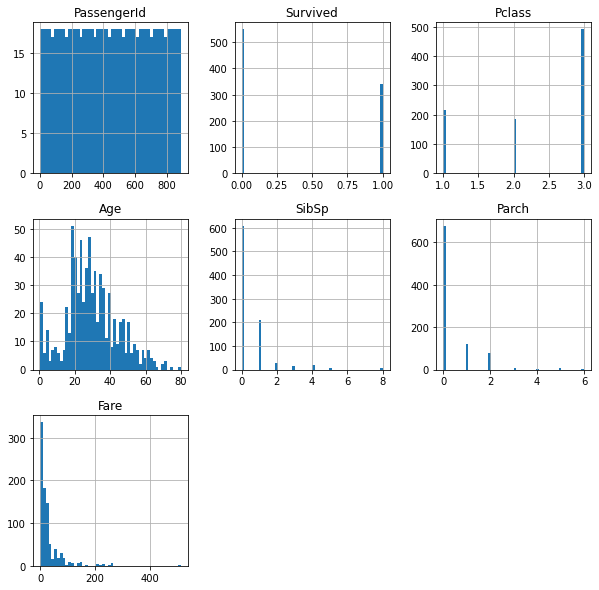

In [ ]:
# Plotando os dados para melhor visualizaçao
dataset_titanic.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# quais as colunas com valores vazios ou nulos?

(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
# Verificando tipos de atributo
# Temos varios dados do tipo float que podemos normatizar

dataset_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Quantos foram os sobrevivents por sexo?
dataset_titanic[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Quantos foram os sobreviventes por classe economica?
dataset_titanic[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

# PEssoa da primeira classe se deu melhor

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Descobrindo a idade média

idadeMedia = dataset_titanic['Age'].mean()
idadeMedia

29.69911764705882

In [ ]:
# Vamos arredondar a idade para remover valores decimais

idadeMedia = math.floor(idadeMedia)

In [ ]:
# Dando um update nos valores de idade nula para a média dos passgeiros

dataset_titanic.update(dataset_titanic['Age'].fillna(idadeMedia))

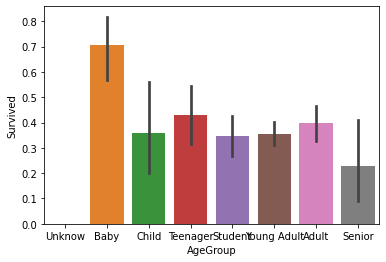

In [ ]:
# vamos usar um processo de bins para montar uma categorias de idade  a partir da feature Age tratada
# e criar assim sobreviventes por faixa etária
bins= [-1,0,5,12,18,24,35,60, np.inf]
labels= ['Unknow','Baby', 'Child', 'Teenager', 'Student', 'Young Adult','Adult', 'Senior']
dataset_titanic['AgeGroup'] = pd.cut(dataset_titanic["Age"], bins, labels =labels)
sns.barplot(x="AgeGroup",y="Survived", data= dataset_titanic)
plt.show()

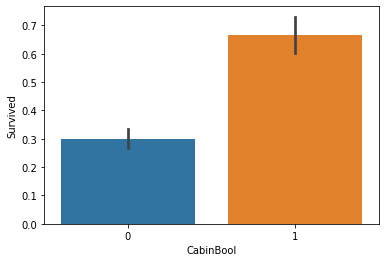

In [ ]:
# Como cabine tem poucos preenchimentos tranformando em bit 0 ou 1

dataset_titanic["CabinBool"]= (dataset_titanic["Cabin"].notnull().astype('int'))

sns.barplot(x='CabinBool', y= 'Survived', data= dataset_titanic)

In [ ]:
# Vmos pegar esses 2 passegeiros que o embarque esta nulo e preencher com algum valor mais constante
dataset_titanic = dataset_titanic.fillna({"Embarked": "S"})

In [ ]:
# Agora mapeando esses valores para númerico
Embarked ={"S":1,"C":2,"Q":3}
dataset_titanic['Embarked'] = dataset_titanic['Embarked'].map(Embarked)

In [ ]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Cabin          687
CabinBool        0
AgeGroup         0
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
# Vamos mudar os dados categoricos de sexo para numerico
sex_mapa = {"male":0, "female":1}
dataset_titanic['Sex'] = dataset_titanic['Sex'].map(sex_mapa)
dataset_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,Young Adult,0


In [ ]:
# Podemos pegar a feature nome e criar alguma feateure a partir do nome de tramento
# Criando uma nova feature a partir do titulo (nome de tratamento)
dataset_titanic ['Titulo'] = dataset_titanic['Name'].str.extract('([A-Za-z]+)\.',expand=False) 

In [ ]:
pd.crosstab(dataset_titanic['Titulo'],dataset_titanic['Sex'])

Sex,0,1
Titulo,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
#Podemos resumir os títulos por tratamentos mais comuns
 
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare') 
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace(['Countess','Lady','Sir'],'Royal')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Mlle','Miss')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Ms','Miss')
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].replace('Mme','Mrs')

In [ ]:
# Transformar titulo em numerico
Titulo = {"Mr":1,"Miss":2, "Mrs":3, "Master":4, "Royal":5, "Rare":6}
dataset_titanic['Titulo']= dataset_titanic['Titulo'].map(Titulo)
dataset_titanic['Titulo'] = dataset_titanic['Titulo'].fillna(0)

In [ ]:
# transformar AgeGroup para numerico

AgeGroup = {"Unknow":0,"Baby":1, "Child":2, "Teenager":3, "Student":4, "Young Adult":5,"Adult":6, "Senior":7}
dataset_titanic['AgeGroup']= dataset_titanic['AgeGroup'].map(AgeGroup)

In [ ]:
# Como está a questão dos nulos agora
(dataset_titanic.isnull().sum()).sort_values(ascending=False)

Cabin          687
Titulo           0
CabinBool        0
AgeGroup         0
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
# Eliminando features com pouco relevancia e "Cabin" pois extraimos o boleano dela
dataset_titanic = dataset_titanic.drop(['Name', 'PassengerId','Cabin'], axis =1)

In [ ]:
# tranformar atributos para númerico
dataset_titanic['AgeGroup'] = dataset_titanic['AgeGroup'].astype('int64')
dataset_titanic['Age'] = dataset_titanic['Age'].astype('int64')
dataset_titanic['Fare'] = dataset_titanic['Fare'].astype('int64')

In [ ]:
# Tipos de dados no dataframe
dataset_titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare          int64
Embarked      int64
AgeGroup      int64
CabinBool     int64
Titulo        int64
dtype: object

Vamos começar rodar as regressões por aqui !!!
Para uma implementação Naive Bayes é importante baixa correlação entre as features

In [ ]:
# Medindo as correlações
corr = dataset_titanic.corr () [["Survived"]].abs().sort_values(by="Survived", ascending =False)
corr  


,Survived
Survived,1.000000
Sex,0.543351
Titulo,0.373139
Pclass,0.338481
CabinBool,0.316912
Fare,0.257482
Embarked,0.106811
AgeGroup,0.104925
Parch,0.081629
Age,0.067809


In [ ]:
maior_corr = corr.index[abs(corr["Survived"])>0]
maior_corr 

Index(['Survived', 'Sex', 'Titulo', 'Pclass', 'CabinBool', 'Fare', 'Embarked',
       'AgeGroup', 'Parch', 'Age', 'SibSp'],
      dtype='object')

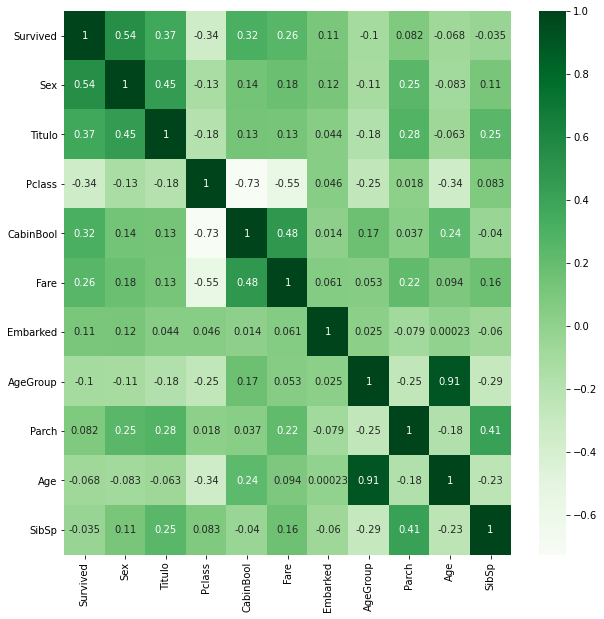

In [ ]:
# Abaixo podemos plotar esses dados num mapa de calor pra entender qual variável faz mais sentido com sales price
plt.figure(figsize=(10,10))
ax = sns.heatmap(dataset_titanic[maior_corr].corr(),annot=True, cmap="Greens")

# COnforme podemos ver no gráfico abaixo as variaveis:
# Age e AgeGroup possui correlação alta (0.92)

In [ ]:
 #Criando um novo dataset sem a feature "Age"

 dataset_titanicGNB = dataset_titanic.drop(['Age','Fare'], axis =1)

In [ ]:
# Normalização das features
dataset_titanicGNB['Pclass'] = dataset_titanicGNB['Pclass']/dataset_titanicGNB['Pclass'].max()
dataset_titanicGNB['SibSp'] = dataset_titanicGNB['SibSp']/dataset_titanicGNB['SibSp'].max()
dataset_titanicGNB['Parch'] = dataset_titanicGNB['Parch']/dataset_titanicGNB['Parch'].max()
dataset_titanicGNB['Embarked'] = dataset_titanicGNB['Embarked']/dataset_titanicGNB['Embarked'].max()
dataset_titanicGNB['AgeGroup'] = dataset_titanicGNB['AgeGroup']/dataset_titanicGNB['AgeGroup'].max()
dataset_titanicGNB['Titulo'] = dataset_titanicGNB['Titulo']/dataset_titanicGNB['Titulo'].max()



In [ ]:
dataset_titanicGNB.describe ()
# Conforme podemos ver abaixo com essa normalização os valores ficaram entre 0 (min) e 1 (max)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Titulo
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.769547,0.352413,0.065376,0.063599,0.453797,0.667789,0.228956,0.291994
std,0.486592,0.278690,0.477990,0.137843,0.134343,0.211891,0.187650,0.420397,0.185473
min,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.142857,0.000000,0.166667
25%,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,0.571429,0.000000,0.166667
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.714286,0.000000,0.166667
75%,1.000000,1.000000,1.000000,0.125000,0.000000,0.666667,0.714286,0.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Criando train teste split

from sklearn.model_selection import train_test_split

 
predictors = dataset_titanicGNB.drop (['Survived','Ticket'], axis=1) 
target = dataset_titanicGNB['Survived']
x_train, x_val, y_train, y_val = train_test_split (predictors, target, test_size = 0.2, random_state=0)

In [ ]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit (x_train, y_train) 
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100 , 2)
print (acc_gaussian)

79.33


In [ ]:
# SVC

from sklearn.svm import SVC

svc = SVC ()
svc.fit (x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print (acc_svc)

82.12
